Make sure which version of DM stack you are using

In [1]:
! eups list -s lsst_distrib

   g0b29ad24fb+9b30730ed8 	current w_2022_40 setup


Import necesarry libraries

In [2]:
import pylab as plt
from lsst.daf.butler import Butler
import lsst.afw.display as afwDisplay
from lsst.ip.isr.isrTask import IsrTask

Define helper function to display image nicely

In [3]:
def display(exposure,title=None):
    afwDisplay.setDefaultBackend('matplotlib') 
    fig = plt.figure(figsize=(10,10))
    afw_display = afwDisplay.Display(1)
    afw_display.scale('asinh', 'zscale')
    afw_display.mtv(exposure.getImage())
    plt.title(title)
    plt.gca().axis('off')

Connect to the Butler repository

In [4]:
repo_path = "/sdf/data/rubin/repo/main"
butler = Butler(repo_path)
collections = 'LSST-TS8/raw/all,LSST-TS8/calib'.split(",")
butler = Butler(repo_path,collections=collections)
registry = butler.registry

Just display the first images matched

In [16]:
where = """
instrument='LSST-TS8' and
exposure.day_obs = 20221017
"""
atyp="raw"
datasetRefs = list(registry.queryDatasets(
    datasetType=atyp,collections=collections,
    where = where
))
print( f"You have {len(datasetRefs)} in this repository with the condition supplied")

You have 135 in this repository with the condition supplied


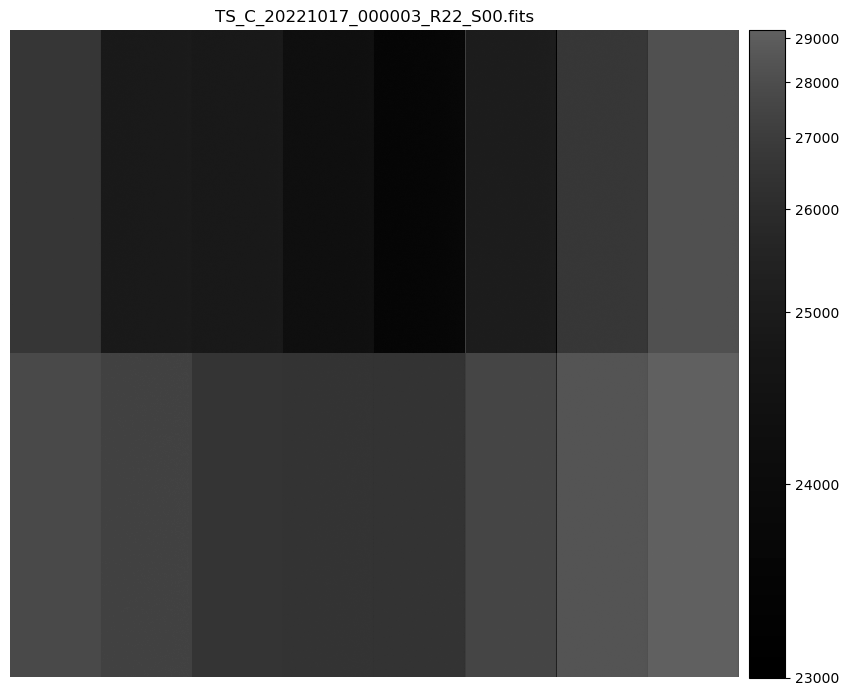

In [36]:
bias = butler.get(datasetRefs[0])
display(bias,bias.getMetadata()["FILENAME"])
plt.show()

Display ISRed image

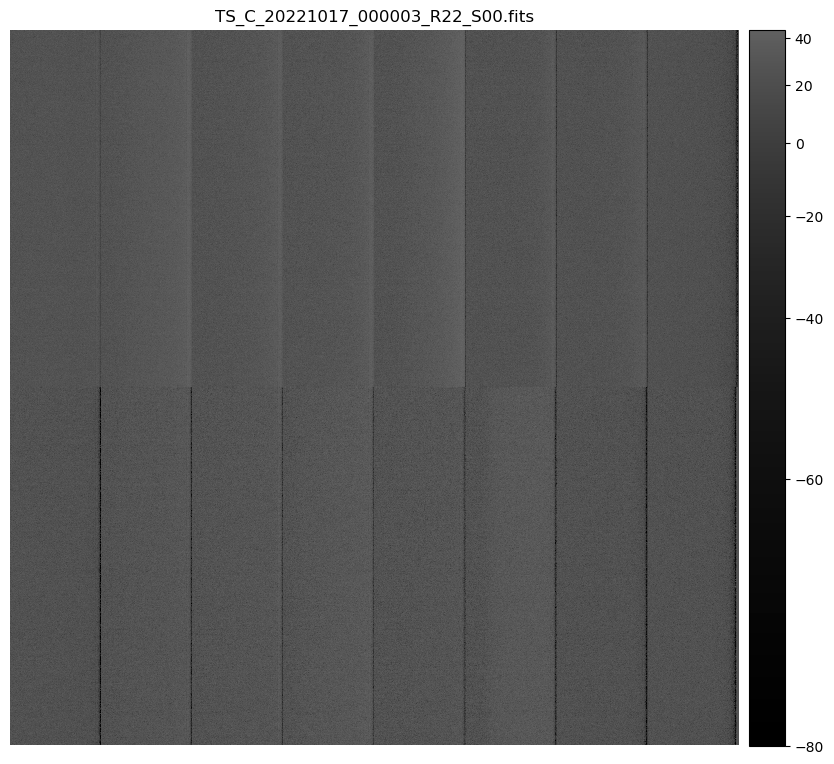

In [37]:
isr = IsrTask()
isr.config.doLinearize=False
isr.config.doDark=False
isr.config.doBias=False
isr.config.doFlat=False
isr.config.doDefect=False
isr.config.overscan.fitType: 'MEDIAN_PER_ROW'
postISRCCD = isr.run(bias)
display(postISRCCD.exposure,bias.getMetadata()["FILENAME"])
plt.show()